In [153]:
import pandas as pd
import numpy as np

In [208]:
one_run = pd.read_csv('/home/MarkF/DivideConquer/Results/10_Runs/'
                 'ica_run_1_independent_components.tsv', sep='\t', index_col=0)
one_run.columns = [f'{x}_1' for x in one_run.columns]

ten_runs = pd.read_csv('/home/MarkF/DivideConquer/Results/10_Runs/'
                 'ica_independent_components_consensus.tsv', sep='\t', index_col=0)
ten_runs.columns = [f'{x}_10' for x in ten_runs.columns]
twenty_five_runs = pd.read_csv('/home/MarkF/DivideConquer/Results/MathExperiment/2_Split/One_Normalized/ICARUN_ALL/'
                 'ica_independent_components_consensus.tsv', sep='\t', index_col=0)
twenty_five_runs.columns = [f'{x}_25' for x in twenty_five_runs.columns]
fifty_runs = pd.read_csv('/home/MarkF/DivideConquer/Results/50_Runs/'
                 'ica_independent_components_consensus.tsv', sep='\t', index_col=0)
fifty_runs.columns = [f'{x}_50' for x in fifty_runs.columns]
hunderd_runs = pd.read_csv('/home/MarkF/DivideConquer/Results/100_Runs/'
                 'ica_independent_components_consensus.tsv', sep='\t', index_col=0)
hunderd_runs.columns = [f'{x}_100' for x in hunderd_runs.columns]


In [209]:
one_run.shape

(19635, 1996)

In [210]:
ten_runs.shape

(19635, 1912)

In [211]:
twenty_five_runs.shape

(19635, 171)

In [212]:
fifty_runs.shape

(19635, 179)

In [213]:
hunderd_runs.shape

(19635, 170)

In [214]:
df = twenty_five_runs.join(fifty_runs)
df = df.join(hunderd_runs)
df = df.join(ten_runs)
df = df.join(one_run)
correlation = np.corrcoef(df.values, rowvar=False)
correlation = np.absolute(correlation)
correlation = pd.DataFrame(correlation, columns=df.columns, index=df.columns)
#correlation = correlation.loc[twenty_five_runs.columns, fifty_runs.columns]

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

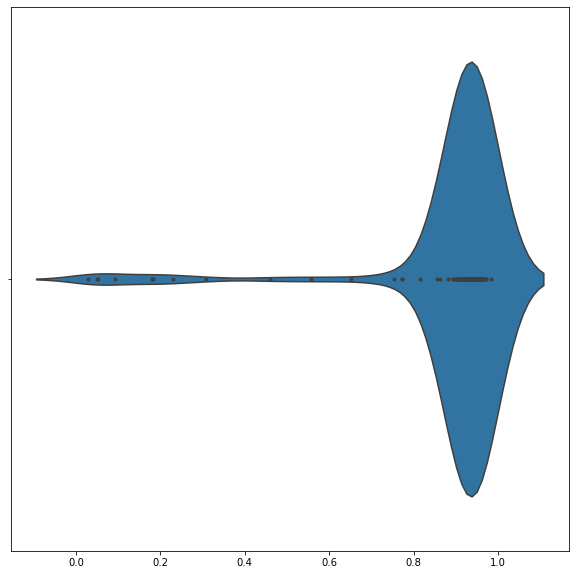

In [182]:
fig = plt.figure(figsize=(10,10))
sns.violinplot(x=correlation.loc[twenty_five_runs.columns, fifty_runs.columns].max(axis=0), inner='point')
plt.show()

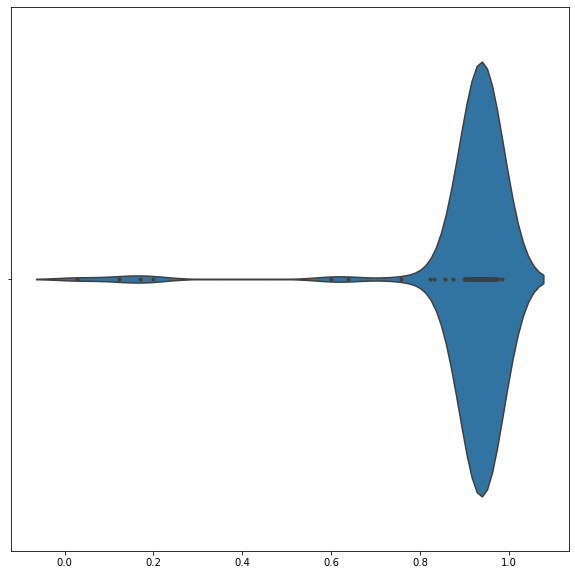

In [183]:
fig = plt.figure(figsize=(10,10))
sns.violinplot(x=correlation.loc[twenty_five_runs.columns, hunderd_runs.columns].max(axis=0), inner='point')
plt.show()

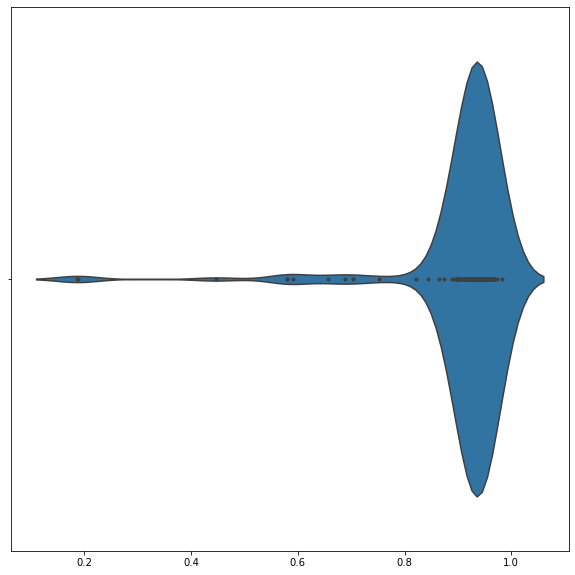

In [184]:
fig = plt.figure(figsize=(10,10))
sns.violinplot(x=correlation.loc[ten_runs.columns, hunderd_runs.columns].max(axis=0), inner='point')
plt.show()

In [196]:
cols = hunderd_runs.columns
#index = [x for x in correlation.columns if x not in cols]
index =  ten_runs.columns
correlation.loc[index, cols].max(axis=0).sort_values()
sum(correlation.loc[index, cols].max(axis=1).sort_values() < 0.6)

1747

In [197]:
cols = hunderd_runs.columns
#index = [x for x in correlation.columns if x not in cols]
index =  twenty_five_runs.columns
sum(correlation.loc[index, cols].max(axis=1).sort_values() < 0.6)

7

In [198]:
cols = hunderd_runs.columns
#index = [x for x in correlation.columns if x not in cols]
index =  fifty_runs.columns
correlation.loc[index, cols].max(axis=0).sort_values()
sum(correlation.loc[index, cols].max(axis=1).sort_values() < 0.6)

10

In [195]:
correlation.loc[index, cols].max(axis=0).sort_values()

consensus independent component 168_100    0.186018
consensus independent component 167_100    0.188024
consensus independent component 159_100    0.446255
consensus independent component 132_100    0.580066
consensus independent component 146_100    0.580594
                                             ...   
consensus independent component 138_100    0.966456
consensus independent component 67_100     0.968120
consensus independent component 50_100     0.968595
consensus independent component 59_100     0.972901
consensus independent component 54_100     0.983444
Length: 170, dtype: float64